# A notebook for Geometry package

Hello, and welcome to our notebook that demonstrate our Geometry package, with all its classes and functions.
The geometry package contains the follwing classes

+ mesh.py  
A class to keep track of relevant data in a computational mesh.  
It uses meshio to read the mesh, and then stores the relevant data.

+ cellfactory.py  
A function for creating a list of new Cell objects based on meshio data

+ cells.py  
An abstract class for handling relevant data of cells in the oil simulation

+ line.py  
A class for handeling Line cells

+ triangle.py  
A class for handeling Triangle cells



We start of by demonstrating the mesh class. The mesh class takes the mesh file in as a string.  


In [1]:
from Geometry.mesh import Mesh
import os
root = "/".join(os.getcwd().split("\\")[:-1])
meshPath = root + "/meshes/bay.msh"

mesh= Mesh(meshPath)
#A mesh file has been added

The Mesh class has one functions.  
  
+ addAllNeighbour  
 Goes through all cells and adds all neighbours for each cell  

Lets demonstrate!

In [ ]:
mesh.addAllNeighbours()
#For this general case, in bay.msh, the function found 3712 neighbours.

None


# Examples for Cells class

The cells class is where all the magic happens.  
The class has the following functions:  
+ __str__  
Returns a string in the form [[X Y Z], [X Y Z], ... , [X Y Z]]
        This is to represent the points that make up the cell  
+ updateOilValue  
+ addNeighbour  
+ updateFlowToNeighbour



In [3]:
for i in range (5):
    print(mesh.cells[i].neighbours)
#Prints type, and coordinates and its neighbours.

{<Geometry.triangle.Triangle object at 0x000001F269C2C690>: array([ 0.01652318, -0.01559162]), <Geometry.triangle.Triangle object at 0x000001F269C2E030>: array([0.0005968 , 0.02362834]), <Geometry.triangle.Triangle object at 0x000001F269D57F70>: array([-0.01711999, -0.00803673])}
{<Geometry.triangle.Triangle object at 0x000001F269C2C7D0>: array([-0.02191027,  0.00476838]), <Geometry.triangle.Triangle object at 0x000001F269C2D770>: array([ 0.00872674, -0.01966921]), <Geometry.triangle.Triangle object at 0x000001F269D802D0>: array([0.01318353, 0.01490083])}
{<Geometry.triangle.Triangle object at 0x000001F23941D020>: array([-0.02462029, -0.0004917 ]), <Geometry.triangle.Triangle object at 0x000001F269C3AB70>: array([ 0.01310655, -0.0193693 ]), <Geometry.triangle.Triangle object at 0x000001F269C3B9D0>: array([0.01151375, 0.019861  ])}
{<Geometry.triangle.Triangle object at 0x000001F269C2D270>: array([ 0.00822945, -0.02083568]), <Geometry.triangle.Triangle object at 0x000001F269C2D590>: arr

# Examples for cellfactory  
Is responsible for cell creation.
Will take in cell type, the cell from mesh, Full points list

In [ ]:
from Geometry.cellfactory import CellFactory
import meshio

factory = CellFactory()
mesh = meshio.read(meshPath)
cellObjects = []
for cell in mesh.cells:
    if cell.type != "vertex":
        cellObjects += factory.createCell(cell.type, cell, mesh.points)

print(f'Number of cells in bay.msh: {len(cellObjects)}')

for cell in cellObjects[:10]:
    print(type(cell))
for cell in cellObjects[-10:]:
    print(type(cell))


3712
<class 'Geometry.line.Line'>
<class 'Geometry.line.Line'>
<class 'Geometry.line.Line'>
<class 'Geometry.line.Line'>
<class 'Geometry.line.Line'>
<class 'Geometry.line.Line'>
<class 'Geometry.line.Line'>
<class 'Geometry.line.Line'>
<class 'Geometry.line.Line'>
<class 'Geometry.line.Line'>
<class 'Geometry.triangle.Triangle'>
<class 'Geometry.triangle.Triangle'>
<class 'Geometry.triangle.Triangle'>
<class 'Geometry.triangle.Triangle'>
<class 'Geometry.triangle.Triangle'>
<class 'Geometry.triangle.Triangle'>
<class 'Geometry.triangle.Triangle'>
<class 'Geometry.triangle.Triangle'>
<class 'Geometry.triangle.Triangle'>
<class 'Geometry.triangle.Triangle'>


# Examples for line  
For the line class lets us demonstrate the functions with this test lines
  
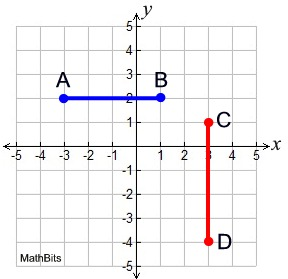


In [12]:
from Geometry.line import Line
import numpy as np

#Lets create a testline to demontrate its functions
TestlineAB = [np.array([-3, 2, 0]), np.array([1, 2, 0])]
TestlineCD = [np.array([3, 1, 0]), np.array([3, -4, 0])]

#The line class takes in a np.array of coordinates and a pointID.
#For this general case. The pointID is trivial
exampleAB = Line(TestlineAB, [])
exampleCD = Line(TestlineCD, []) 

#Line function will link the ID with the coordinates.
#The coordinates is P1 = [x, y, z] and P2 = [x, y, z] 
print(f' The line AB is defined by the coordinates: {exampleAB}')
print(f' The line CD is defined by the coordinates: {exampleCD}')


 The line AB is defined by the coordinates: [[-3, 2, 0], [1, 2, 0]]
 The line CD is defined by the coordinates: [[3, 1, 0], [3, -4, 0]]


# Examples for triangle  
For the triangle class lets us demonstrate the functions with this two neigbouring triangles  
  
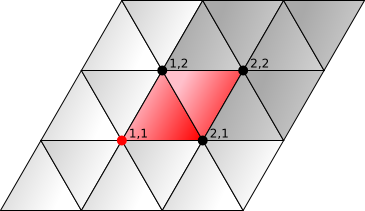

In [ ]:
from Geometry.triangle import Triangle
TestTriangle1 = [np.array([1, 1, 0]), np.array([1, 2, 0]), np.array([2, 1, 0])]
TestTriangle2 = [np.array([2, 2, 0]), np.array([1, 2, 0]), np.array([2, 1, 0])]

#The Triangle class will link the ID with the coordinates.
#The coordinates is P1 = [x, y, z], P2 = [x, y, z] , P3 = [x , y, z] 
exampleTriangle1 = Triangle(TestTriangle1, 6)
exampleTriangle2 = Triangle(TestTriangle2, 7)

print(f'TestTriangle 1 is defined by the coordinates: {exampleTriangle1}\nTestTriangle 2 is defined by the coordinates: {exampleTriangle2}\n')
#which is both string representations. 
#The coordinates really looks like this
print(f'Triangle 1: {exampleTriangle1.coordinates}\nTrigangle 2: {exampleTriangle2.coordinates}')

TestTriangle 1 is defined by the coordinates: [[1, 1, 0], [1, 2, 0], [2, 1, 0]]
TestTriangle 2 is defined by the coordinates: [[2, 2, 0], [1, 2, 0], [2, 1, 0]]

Triangle 1: [array([1, 1, 0]), array([1, 2, 0]), array([2, 1, 0])]
Trigangle 2: [array([2, 2, 0]), array([1, 2, 0]), array([2, 1, 0])]


We can calculate a lot of the triangle properties like for example  
+ The area  
+ Center point  
+ Scaled Normals

In [ ]:
print(f'The area of Triangle 1 is :{exampleTriangle1.area} and the area of Triangle 2 is: {exampleTriangle2.area}')
print(f'The center point of  Triangle1 is: {exampleTriangle1.centerPoint} and for Triangle 2 it is: {exampleTriangle2.centerPoint}')
print(f'The scaled normal for Testtriangle1 point 1 and 2 will be: {exampleTriangle1.calculateScaledNormal([TestTriangle1[0],TestTriangle1[1]])}')


The area of Triangle 1 is :0.5 and the area of Triangle 2 is: 0.5
The center point of  Triangle1 is: [1.33333333 1.33333333 0.        ] and for Triangle 2 it is: [1.66666667 1.66666667 0.        ]
The scaled normal for Testtriangle 1 point 1 and 2 will be: [-1.  0.]
